# Bibliotecas

In [1]:
#Importa bibliotecas necessárias
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import math

----
# Parâmetros do modelo

In [2]:
# Dimensões (m)
r = 0.15                                # Copo (raio interno)
h_copo = 0.28                           # Copo (altura)
d_copo = 0.008/2                        # Copo (espessura)/2

# Áreas (m2)
As = math.pi*r**2                       # Água (superfície)
Api = h_copo*2*math.pi*r                # Copo (paredes internas)
Ape = Api                               # Copo (paredes externas)

# Volumes (m3)
v_agua = As*h_copo                      # Água
v_copo = 2*d_copo*(Ape+As)              # Recipiente

# Densidades (kg/m3)
rho_agua = 997                          # Água
rho_copo = 2600                         # Copo (vidro)

# Massas (kg)
m_agua = rho_agua*v_agua                # Água
m_copo = rho_copo*v_copo                # Copo

# Calores específicos (J/(kg.K))
c_agua = 4190                           # Água
c_copo = 840                            # Copo (vidro)

# Coeficiente de condutividade térmica (W/(m.K))
k_copo = 1.05                           # Copo (vidro)

# Coeficientes de transferência convectiva (W/(m2.K))
ha = 10                                 # Água ➞ ar
hc = 7                                  # Copo ➞ ar

#Temperaturas (K)
T_ar = 26+273.15                        # Ambiente
T_agua = 90+273.15                      # Água
T_copo = T_agua                         # Copo

----
# Funções de transferência do calor

## Fluxo de calor água ➞ ar

In [3]:

def Fun_Qagua_ar(T_agua):

    ΔT = T_agua - T_ar
    Qagua_ar = ha * As * ΔT

    return Qagua_ar

## Fluxo de calor água ➞ copo

In [4]:

def Fun_Qagua_copo(T_agua, T_copo):
    
    ΔT = T_agua - T_copo
    Qagua_copo = (k_copo * Api * ΔT) / d_copo

    return Qagua_copo

## Fluxo de calor copo ➞ ar

In [5]:

def Fun_Qcopo_ar(T_copo):

    ΔT = T_copo - T_ar
    Qcopo_ar = ΔT / (d_copo/(k_copo*Ape) + 1/(hc*Ape))
    
    return Qcopo_ar

----
# 1° iteração

In [6]:
# função usada pela odeint
def modelo(x, lista_t_h):

    T_agua = x[0]
    T_copo = x[1]

    dT_aguadt = -Fun_Qagua_ar(T_agua) - Fun_Qagua_copo(T_agua, T_copo) / (m_agua * c_agua)
    dT_copodt = Fun_Qagua_copo(T_agua, T_copo) - Fun_Qcopo_ar(T_copo) / (m_copo * c_copo)

    dxdt = [dT_aguadt, dT_copodt]    

    return dxdt
    

----
# Validação

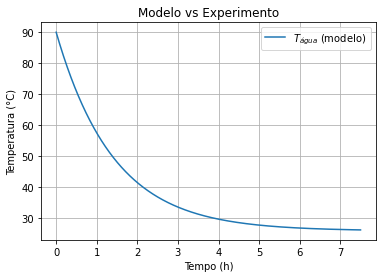

In [7]:

lista_t_s = np.arange(0, 3600 * 7.5, 1)  # tempo (s)
lista_t_h = lista_t_s/3600               # tempo (h)

x0 = [T_agua, T_copo]                    # temperatura (K)

lista_x = odeint(modelo, x0, lista_t_h)  # temperaturas (K)

lista_Ta = lista_x[:,0]-273.15           # temperaturas (°C)
lista_Tc = lista_x[:,1]-273.15           # temperaturas (°C)

plt.plot(lista_t_h, lista_Ta, label = '$T_{água}$ (modelo)')
# plt.plot(lista_t_h, lista_Tc, label = '$T_{copo}$ (modelo)')
# plt.plot(lista_t_h, experimento, label = '$T_{água}$ (experimento)', 'ro')

plt.title('Modelo vs Experimento')
plt.xlabel('Tempo (h)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()

----
# Gráfico comclusivo

In [8]:
# função usada para achar tempo de equilíbrio
def T_equilibrio(lista_Ta, lista_t_h):
    if lista_Ta[0] > T_ar-273.15:
        i = 0
        while lista_Ta[i] > 1.02*(T_ar-273.15):
            i += 1
        return lista_t_h[i]
    else:
        i = 0
        while lista_Ta[i] < 1/1.02*(T_ar-273.15):
            i += 1
        return lista_t_h[i]

T0 da águal: 0.0°C Equilíbrio térmico: 5:33
T0 da águal: 6.0°C Equilíbrio térmico: 5:11
T0 da águal: 16.0°C Equilíbrio térmico: 4:12
T0 da águal: 26.0°C Equilíbrio térmico: 0:0
T0 da águal: 36.0°C Equilíbrio térmico: 4:10
T0 da águal: 46.0°C Equilíbrio térmico: 5:9
T0 da águal: 56.0°C Equilíbrio térmico: 5:44
T0 da águal: 66.0°C Equilíbrio térmico: 6:8
T0 da águal: 76.0°C Equilíbrio térmico: 6:27
T0 da águal: 86.0°C Equilíbrio térmico: 6:43
T0 da águal: 96.0°C Equilíbrio térmico: 6:56
T0 da águal: 100.0°C Equilíbrio térmico: 7:0


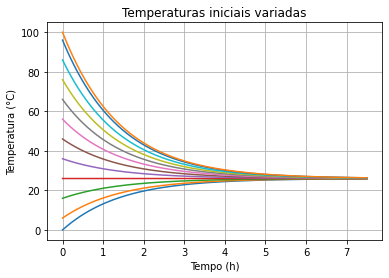

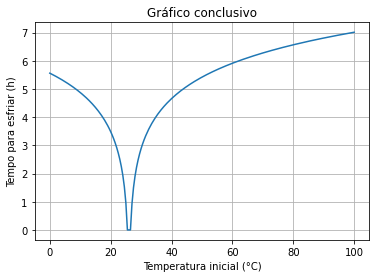

In [9]:

lista_t_equilibrio = []
lista_Ti_agua = np.arange(0+273.15, 100.1+273.15, 0.5)

i = 0
for Ti_agua in lista_Ti_agua:
    Ti_copo = Ti_agua
    x = [Ti_agua, Ti_copo]
    lista_x = odeint(modelo, x, lista_t_h)
    lista_Ta = lista_x[:,0]-273.15
    lista_t_equilibrio.append(T_equilibrio(lista_Ta, lista_t_h))

    # plota gráfico de esfriamento ou aquecimento da água em 12 diferentes temp. iniciais
    if (i-12)%20 == 0 or i == 0 or i == 200:
        T = (0.5*i)
        t = T_equilibrio(lista_Ta, lista_t_h)
        h = int(t)
        min = int((t -  h)*60)
        print('T0 da águal: {}°C Equilíbrio térmico: {}:{}'.format(T, h, min))
        plt.plot(lista_t_h, lista_Ta)
    i += 1

plt.title('Temperaturas iniciais variadas')
plt.xlabel('Tempo (h)')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.show()

# plota gráfico conclusivo
plt.plot((lista_Ti_agua-273.15), lista_t_equilibrio)
plt.title('Gráfico conclusivo')
plt.xlabel('Temperatura inicial (°C)')
plt.ylabel('Tempo para esfriar (h)')
plt.grid(True)
plt.show()

----
# Fontes

- Densidade da água: https://www.engineeringtoolbox.com/water-density-specific-weight-d_595.html
- Densidade do vifro: https://www.engineeringtoolbox.com/density-solids-d_1265.html
- Calor especifico da água: https://www.engineeringtoolbox.com/specific-heat-fluids-d_151.html
- Calor especifico da vidro: https://www.engineeringtoolbox.com/specific-heat-solids-d_154.html
- Coeficiente condutividade térmica do vidro: https://www.engineeringtoolbox.com/thermal-conductivity-d_429.html
- Coeficiente de transferência convectiva do ar: https://www.engineeringtoolbox.com/overall-heat-transfer-coefficient-d_434.html